<a href="https://colab.research.google.com/github/ajinkya8010/Big_Sales_Pred_RF/blob/main/big_sales_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Big Sales Prediction using Random Forest Regressor**


**Objective**

To predict Big Sales of Goods using Random Forest

**Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/Big%20Sales%20Data.csv

**Import Library**

In [20]:
import pandas as pd

In [21]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

**Import Data**

In [24]:
df = pd.read_csv(f"https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Big%20Sales%20Data.csv")

**Describe Data**

In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


**Data Visualization**

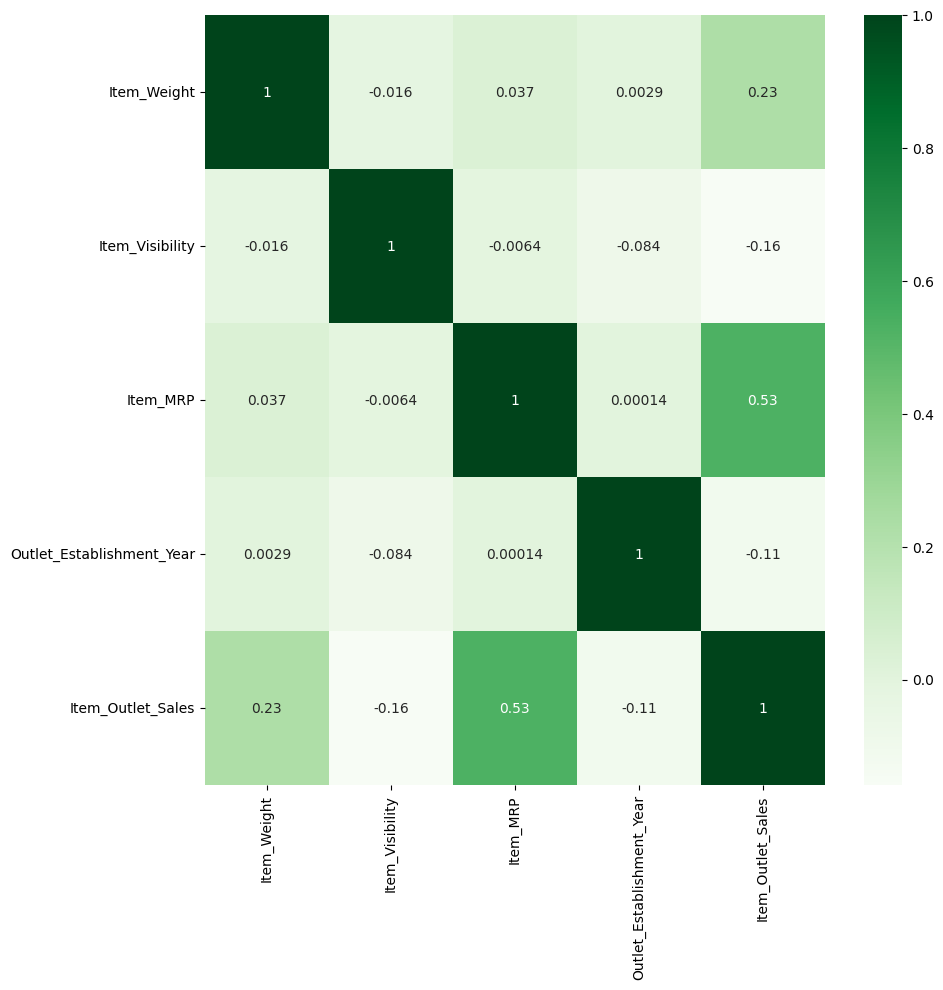

In [26]:
plt.figure(figsize=(10,10))  #To visualize the correlation among columns
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='Greens');

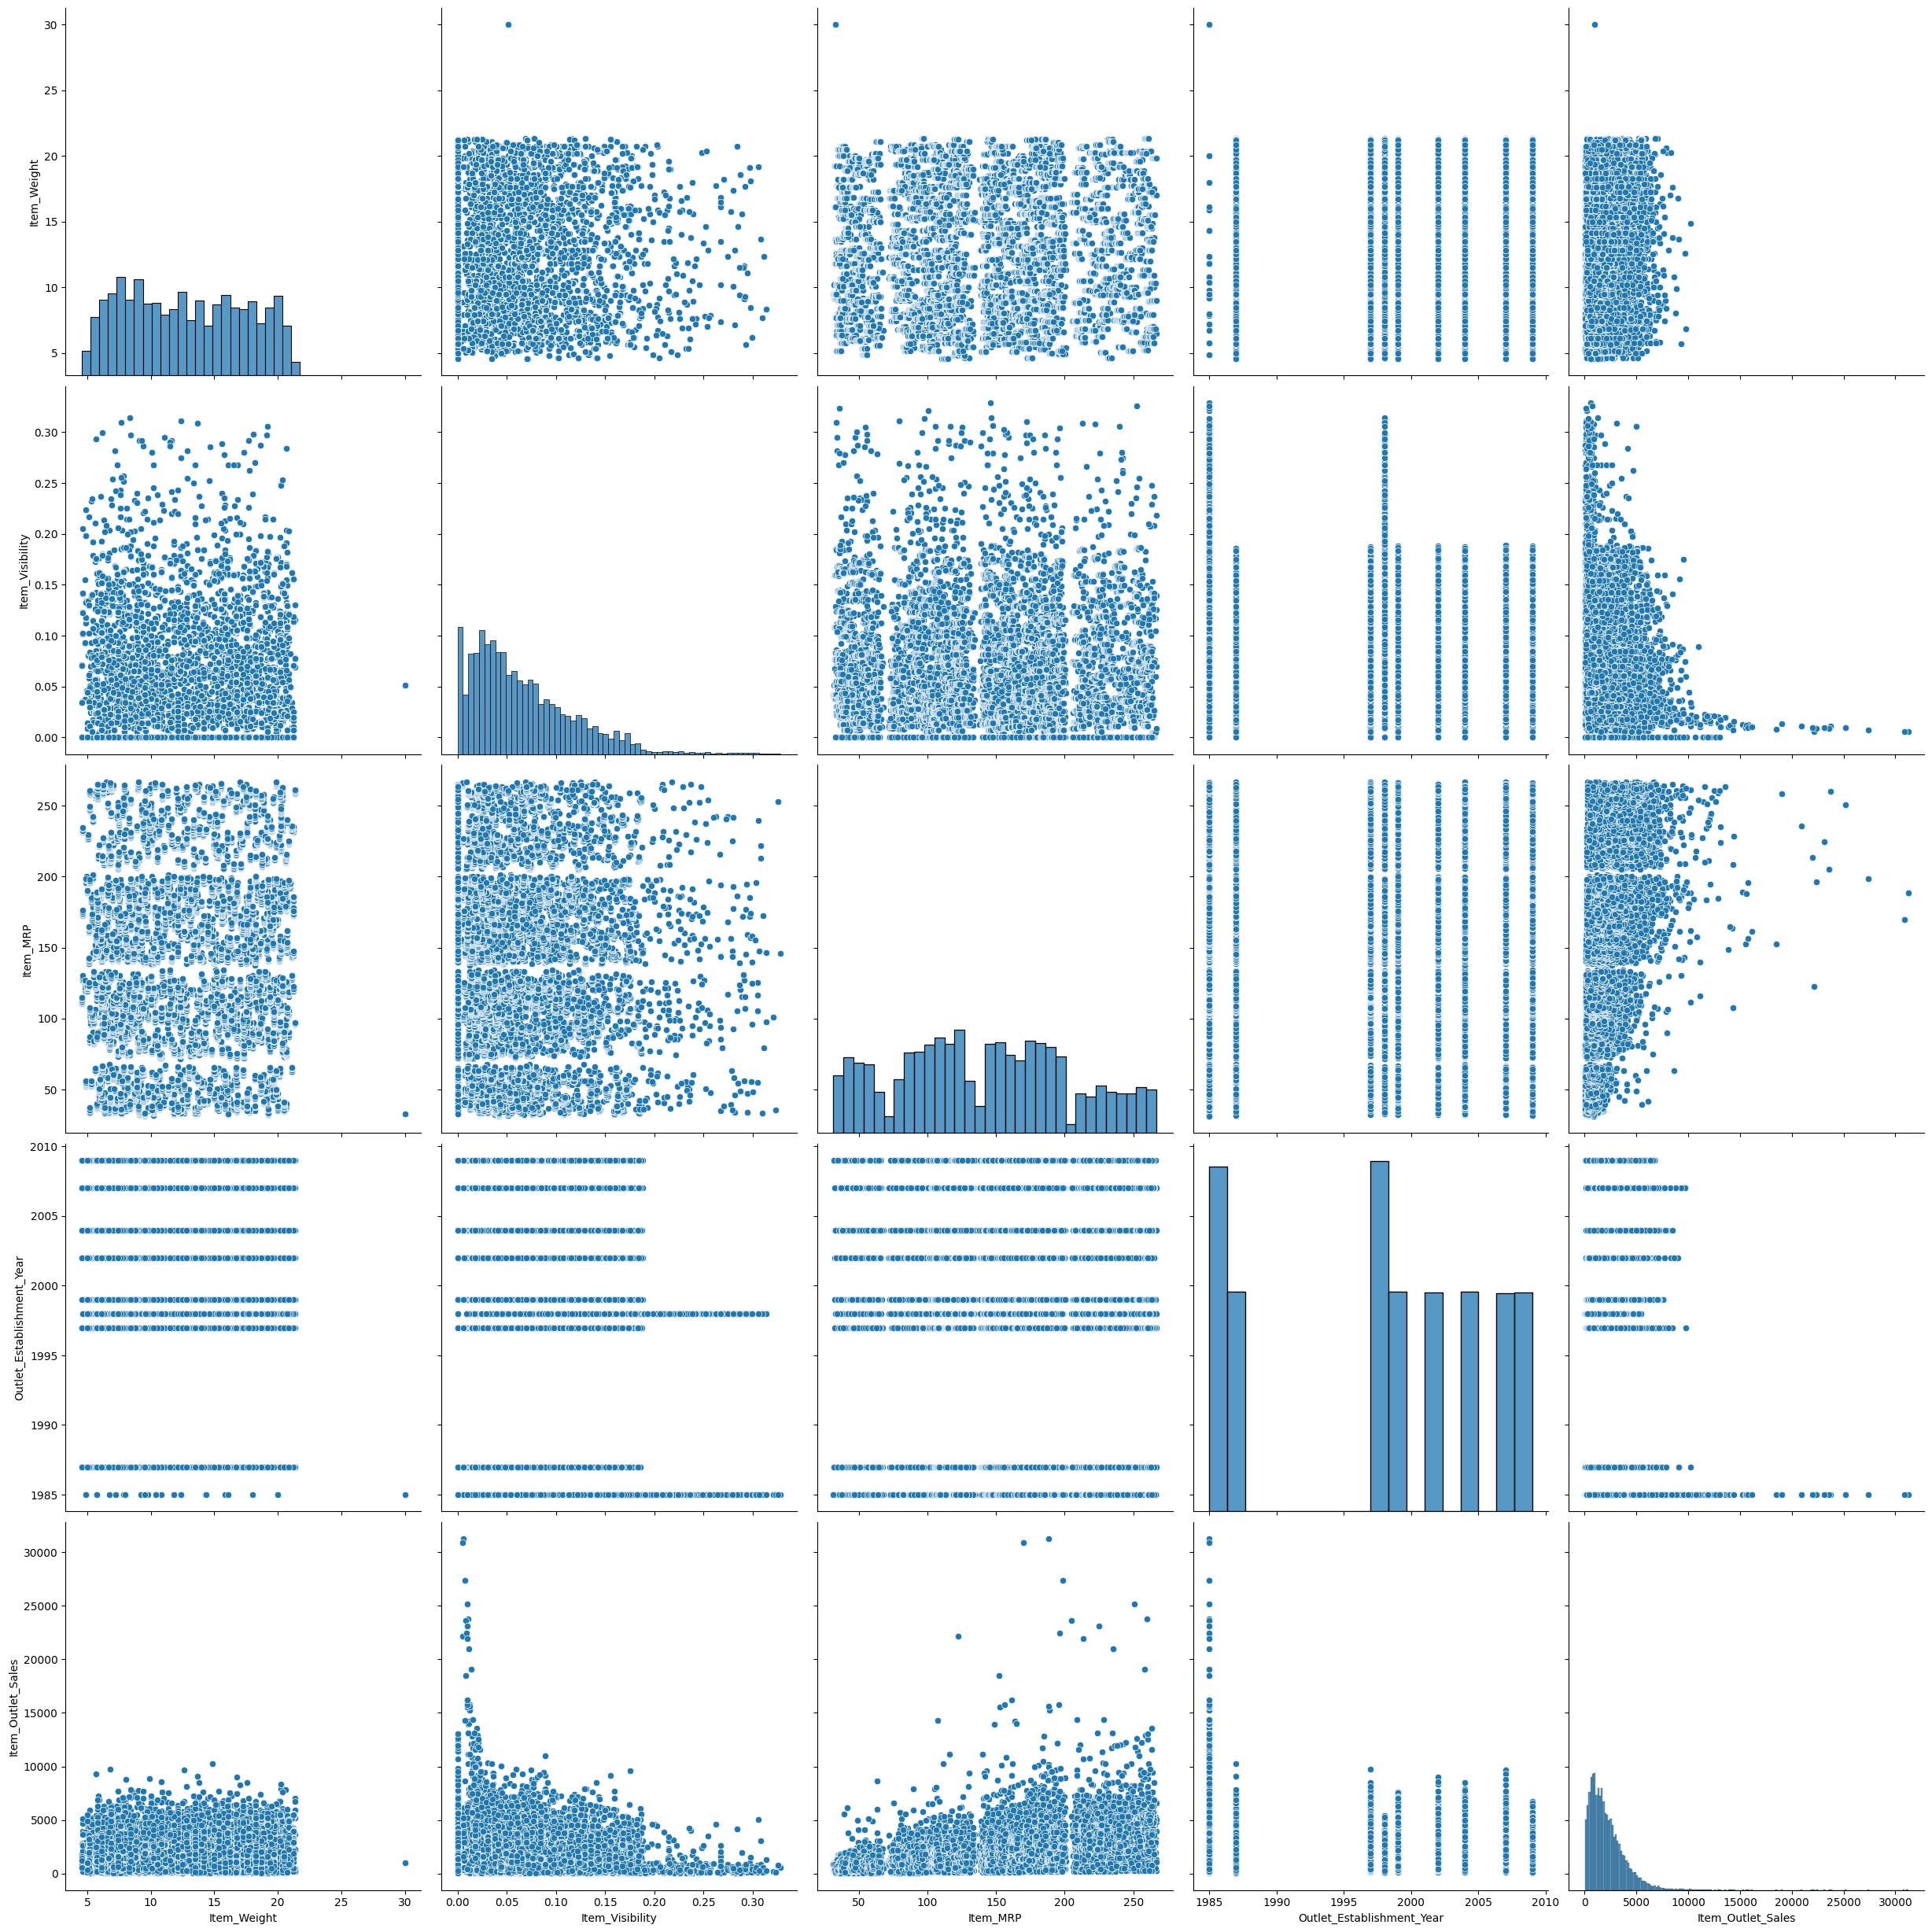

In [27]:
sns.pairplot(df, height=5)

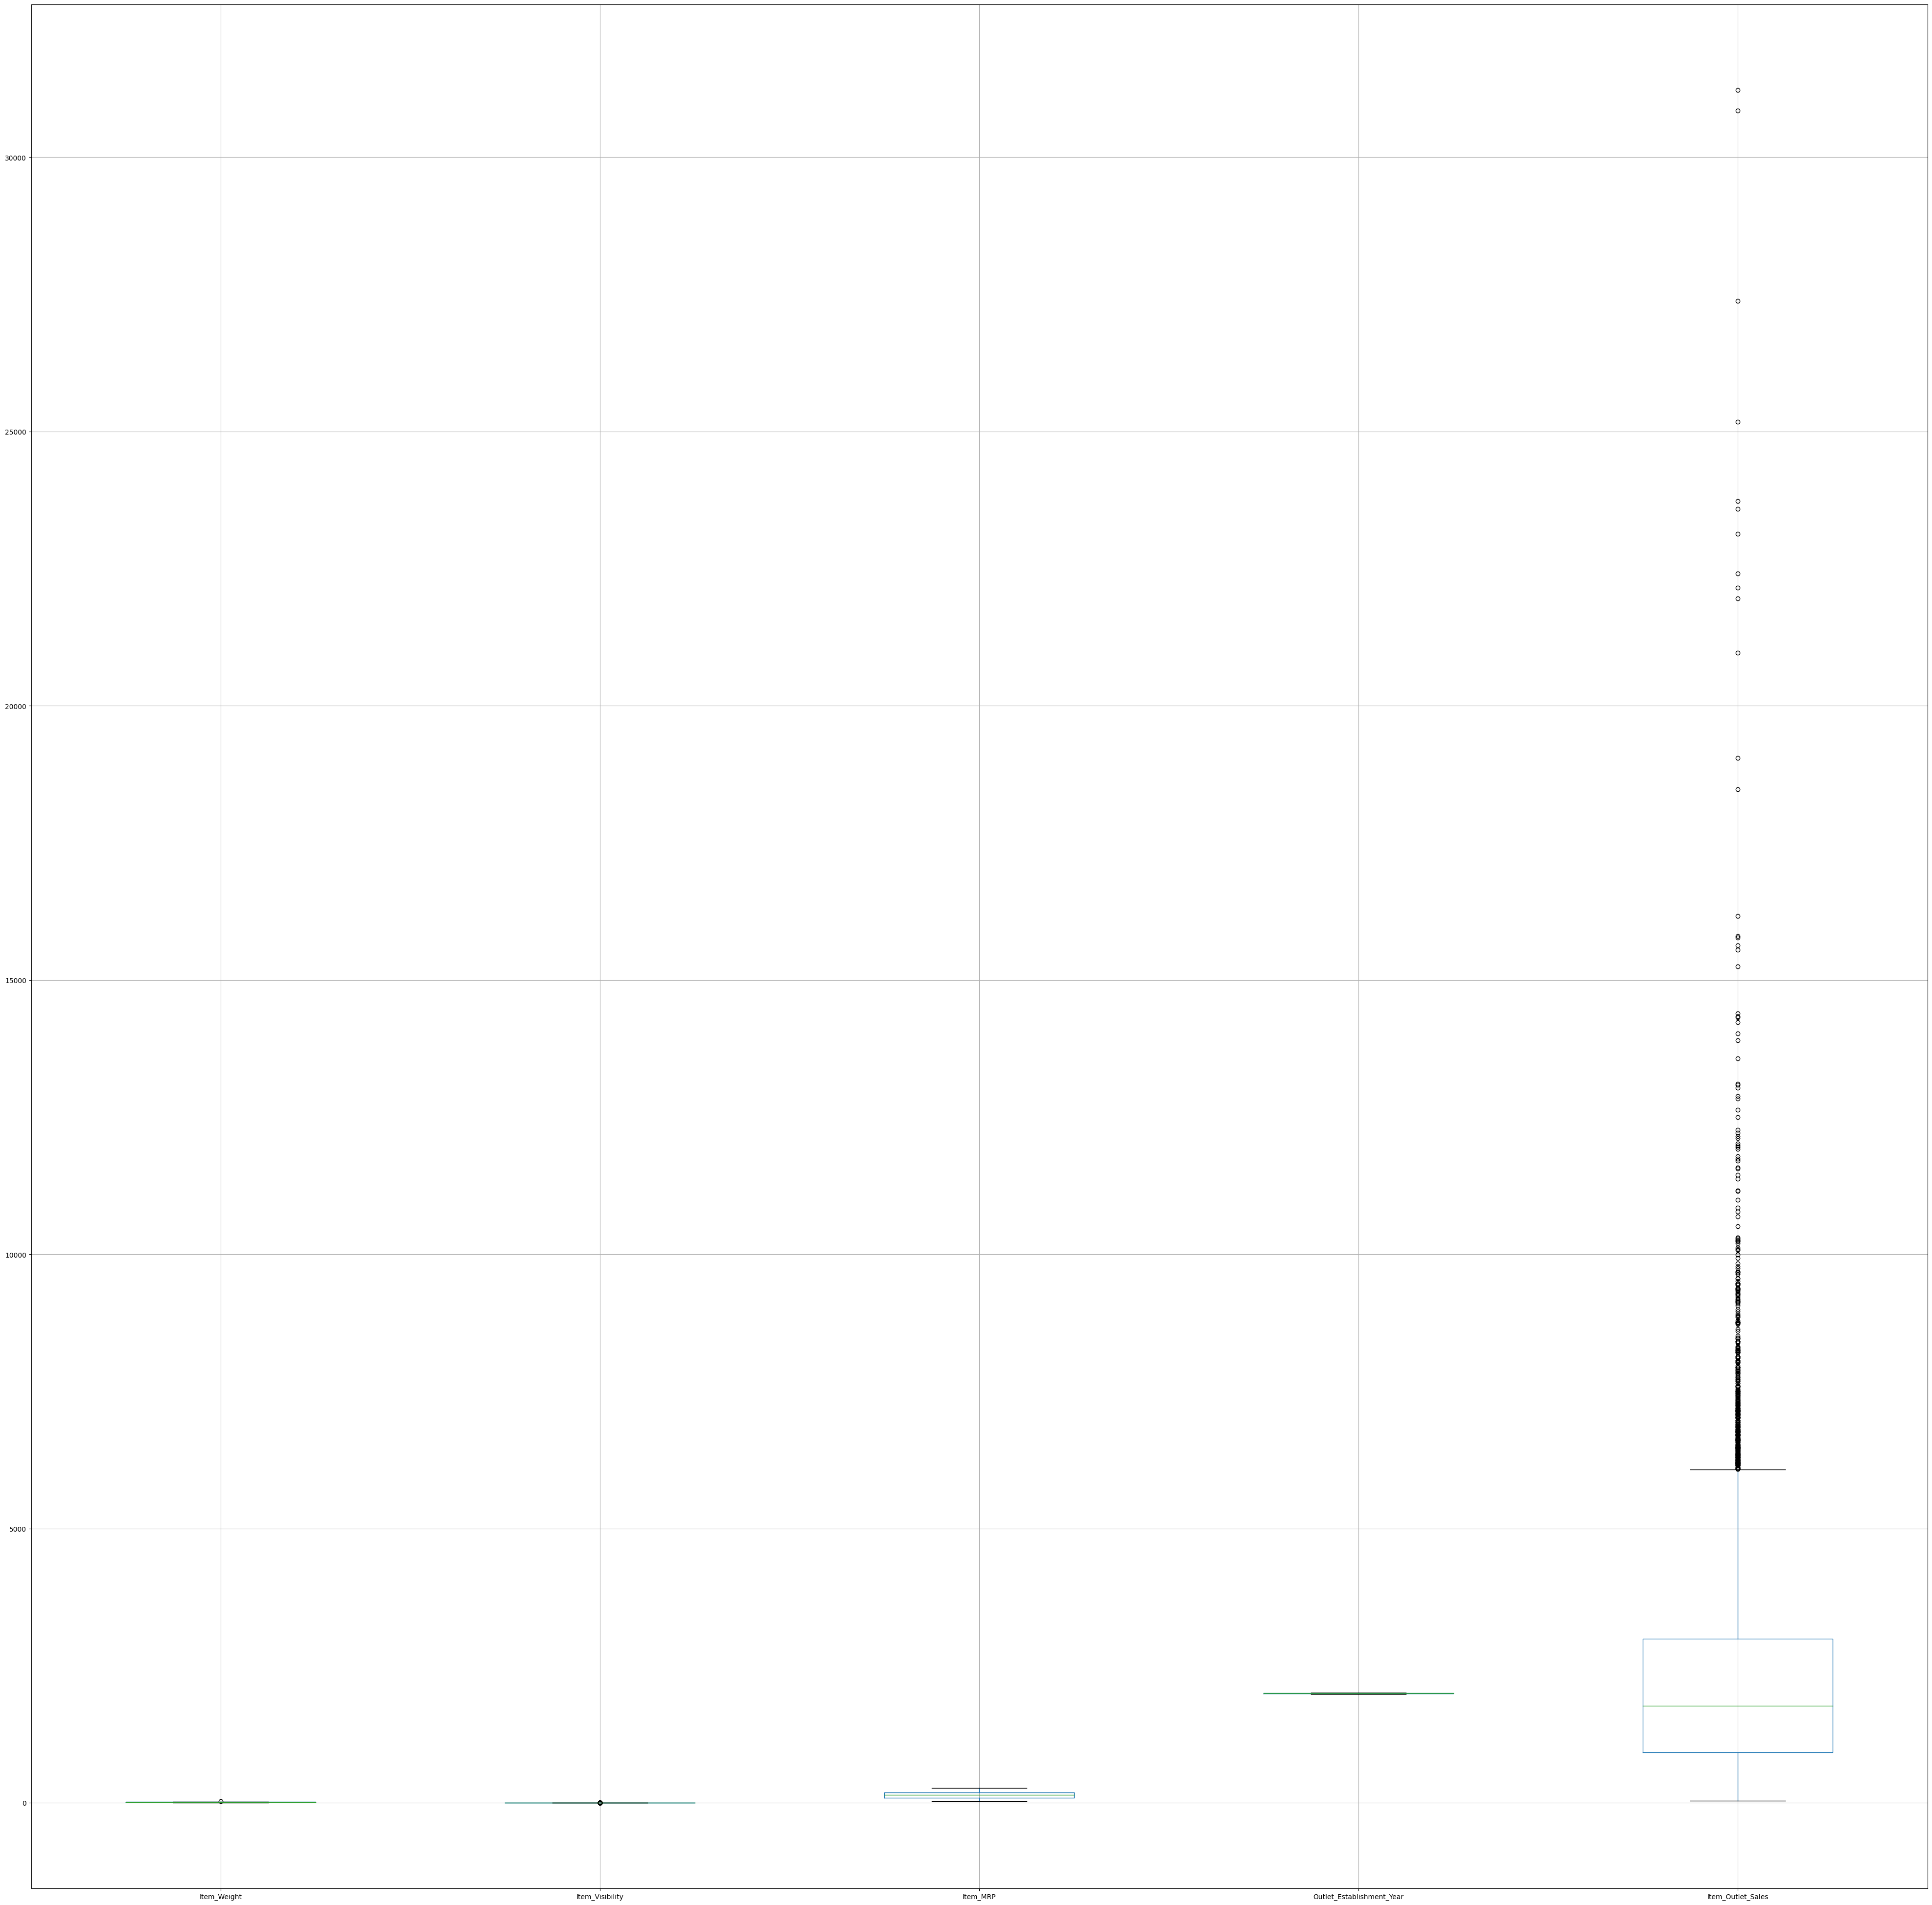

In [28]:
plt.figure(figsize=(50,50))
df.boxplot();

**Data Preprocessing**

Handle missing values

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [30]:
# No need of Item_Identifier column
df = df.drop("Item_Identifier",axis = 1)

In [31]:
df.isna().sum()

Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                11815 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.2+ MB


In [33]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True) # Since no outliers, fill na with mean

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.2+ MB


Making sure data is numerical

In [35]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [36]:
len(df)

14204

In [37]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [38]:
df.nunique()

Item_Weight                    417
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             9144
dtype: int64

In [39]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [40]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace = True)

In [41]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [42]:
# Turn categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)], remainder="passthrough")
transformed_df = transformer.fit_transform(df).toarray()  # Convert sparse matrix to dense array
transformed_df = pd.DataFrame(transformed_df)  # Convert to DataFrame

# Print the transformed DataFrame
print(transformed_df)

        0    1    2    3    4    5    6    7    8    9   ...   33   34   35  \
0      1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
1      1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
2      1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
3      1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
4      0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
14199  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
14200  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
14201  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  1.0   
14202  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
14203  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   

        36   37         38        39        40     

**Define Target Variable (y) and Feature Variables (X)**

In [43]:
X = transformed_df.drop(42,axis=1)


In [44]:
y = transformed_df[42]

In [45]:
X.shape

(14204, 42)

In [46]:
y.shape

(14204,)

**Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
np.random.seed(42)
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.1)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12783, 42), (1421, 42), (12783,), (1421,))

**Modeling**

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
np.random.seed(42)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

**Hyper-parameter tuning**

In [91]:
'''grid = {
    'n_estimators':[200,250],
    'max_features':['sqrt'],
    'max_depth':[None],
    'max_samples':[0.75],
    'min_samples_split':[5,7,10,13],
    'min_samples_leaf':[1,2],
    'bootstrap':[True]
}'''

In [92]:

from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(estimator=rf,
                       param_grid=grid,
                       cv = 5,
                       verbose=2
                       )

gs_model.fit(X_train,y_train);


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   6.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=0.75, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   5.7s
[CV

In [93]:
gs_model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.75,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

**Prediction**

In [84]:
y_pred = gs_model.predict(X_test)

In [85]:
y_pred.shape

(1421,)

In [86]:
y_pred

array([2512.99018268,  975.85342168, 3827.53221835, ..., 1223.01473265,
        608.78320339,  981.73217176])

**Model Evaluation**

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [88]:
mean_squared_error(y_test,y_pred)

1701864.7685480826

In [89]:
mean_absolute_error(y_test,y_pred)

826.0645885860425

In [90]:
r2_score(y_test,y_pred)

0.5095424340574695

**Explaination**

This is project entitled '**Big Sales Prediction using Random Forest Regressor**' aims towards predicting accurate sales based on provied information. And for that Random Forest Regressor is used.
Following are the steps and challanges:

* Importing the libraries and data
* Data contained 12 columns out of which one columned named 'Item_Identifier' was ignored. Column 'Item_Outlet_Sales' was considered as output variable.
* Missing values were filled using pandas. Categorical variables were converted into numbers using OneHotEncoder and ColumnTransformer.
* Data was split into train and test using 'train_test_split'. 10 percent of data was used for testing.
* RandomForestRegressor model was used for training and prediction. 'Mean Absolute Error', 'Mean Squared Error', 'r^2 score' were used as Evaluation metrics.





# Base Model Results
1. R2_score = 0.44767586465100917
2. MSE = 1916538.8650144152
3. MAE = 838.8258621830767

# After expirimentation I
1. R2_score = 0.5243749222046686
2. MSE = 1650396.7298012136
3. MAE = 827.7514230033707

Best params:
{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.75,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

 # After expirimentation II
1. R2_score = 0.5095424340574695
2. MSE = 1701864.7685480826
3. MAE = 826.0645885860425

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}